In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [19]:
def give_recommendations(index,restaurants, cos_sim_data, print_recommendation = False,print_recommendation_plots= False,print_genres =False):
  index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
  recos = []
  for i in index_recomm:
    print(restaurants.iloc[i]['url'])
    recos.append(restaurants.iloc[i]['url'])
  return recos

In [20]:
# find similarities between restaurants
def generate_similarities(restaurants):
    X = np.array(restaurants.iloc[0:, 1:])
    cos_sim_data = pd.DataFrame(cosine_similarity(X))
    return cos_sim_data

In [21]:
# plot the distribution of cosine similairty scores
# why are the scores so concentrated between 0.88 to 0.95? Might come from nature of input data. Keywords frome each topic is almost the same except hte location of restaurants. How do we deal w this?
import seaborn as sns

def plot_similarity_distribution(cos_sim_data):
    sns.distplot(cos_sim_data[0], hist=True, kde=True, 
                bins=int(180/5), color = 'darkblue', 
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 4})

In [22]:
def standardise(old_data, url_col_name):
    scaler = MinMaxScaler()
    data = pd.DataFrame()
    data[url_col_name] = old_data[url_col_name]
    data[old_data.drop(url_col_name,axis = 1).columns] = pd.DataFrame(scaler.fit_transform(old_data.drop(url_col_name, axis =1)))
    data.columns = old_data.columns
    return data
    

In [23]:
reviewer_reviews_df = pd.read_csv('../cleaning/cleaned_reviewer_reviews.csv', index_col=0).reset_index(drop=True) 
#reviewer_reviews_df = pd.read_csv('scrape/reviewer-data/all_reviewer_reviews.csv', index_col=0).reset_index(drop=True) ###### TO CHANGE FILE PATH TO THE CORRECT ONE
reviewer_reviews_df.head(2)

name  \
0                Kazoku Japanese Cuisine               
1                   Tigerlily Patisserie               

                                             address  \
0                1 Goldhill Plaza, Singapore     ...   
1                350 Joo Chiat Road, Singapore   ...   

                                              review  \
0  \n1-for-1 Don\nKazoku Chirashi Don (S$29.90++)...   
1  \nBrunch\nBeehive (S$15+)\nLemon, thyme and ly...   

                                          date  \
0                           4d ago               
1                Feb 26 at 12:44pm               

                                                link    reviewer  keep  \
0  https://www.burpple.com/kazoku-japanese-cuisin...  alamakgirl     1   
1  https://www.burpple.com/tigerlily-patisserie?b...  alamakgirl     1   

                                        cleaned_text  
0  kazoku chirashi s2990 thick slice tuna salmon ...  
1  beehive s15 lemon thyme lychee honey jelly lig...

## Doc2Vec Trigram Recommendation Results

In [24]:
doc2vec = pd.read_csv("../topic_modelling/doc2vec_labelled_restaurants_model4.csv", index_col = 0)
doc2vec

url  cleaned_price  \
0    https://www.burpple.com/108-matcha-saro?bp_ref...           10.0   
1    https://www.burpple.com/136-hong-kong-street-f...           15.0   
2    https://www.burpple.com/15-stamford?bp_ref=%2F...           60.0   
3    https://www.burpple.com/25-degrees-singapore?b...           20.0   
4    https://www.burpple.com/46-mittsu?bp_ref=%2Ff%...           15.0   
..                                                 ...            ...   
840  https://www.burpple.com/yun-nans?bp_ref=%2Ff%2...           20.0   
841  https://www.burpple.com/zafferano?bp_ref=%2Ff%...          100.0   
842  https://www.burpple.com/zai-shun-curry-fish-he...           15.0   
843  https://www.burpple.com/zazz-pizza?bp_ref=%2Ff...           20.0   
844  https://www.burpple.com/zoeys-diner?bp_ref=%2F...           15.0   

     Healthy  Noodles  Indian  Seafood  BBQ  High Tea  Good Environment  \
0          0        0       0        0    0         0                 0   
1          0        0       0        0    0         0                 0   
2          0        0       0        1    0         0                 0   
3          0        0       0        0    0         0                 0   
4          0        0       0        0    0         1                 0   
..       ...      ...     ...      ...  ...       ...               ...   
840        0        0       0        0    0         0                 0   
841        0        1       0        0    0         0                 1   
842        0        0       0        1    0         0                 0   
843        0        1       0        0    0         0                 0   
844        0        0       0        0    0         1                 0   

     Chinese  ...  Tiong Bahru  Toa Payoh  Upper Bukit Timah  \
0          0  ...            0          0                  0   
1          1  ...            0          0                  0   
2          0  ...            0          0                  0   
3          0  ...            0          0                  0   
4          0  ...            0          0                  0   
..       ...  ...          ...        ...                ...   
840        1  ...            0          0                  0   
841        0  ...            0          0                  0   
842        1  ...            0          0                  0   
843        0  ...            0          0                  0   
844        0  ...            0          0                  0   

     Upper East Coast Road  West Coast  Yishun  0  1  2  3  
0                        0           0       0  0  0  1  0  
1                        0           0       0  0  0  1  0  
2                        0           0       0  1  0  0  0  
3                        0           0       0  0  0  1  0  
4                        0           0       0  0  0  1  0  
..                     ...         ...     ... .. .. .. ..  
840                      0           0       0  0  1  0  0  
841                      0           0       0  0  1  0  0  
842                      0           0       0  0  0  1  0  
843                      0           0       0  0  0  1  0  
844                      0           0       0  0  0  1  0  

[845 rows x 129 columns]

In [25]:
doc2vec = standardise(doc2vec, 'url')

/var/folders/74/n55gd6gs38n5wj2k6hwrc_yc0000gn/T/ipykernel_4192/3381840846.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[old_data.drop(url_col_name,axis = 1).columns] = pd.DataFrame(scaler.fit_transform(old_data.drop(url_col_name, axis =1)))
/var/folders/74/n55gd6gs38n5wj2k6hwrc_yc0000gn/T/ipykernel_4192/3381840846.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[old_data.drop(url_col_name,axis = 1).columns] = pd.DataFrame(scaler.fit_transform(old_data.drop(url_col_name, axis =1)))
/var/folders/74/n55gd6gs38n5

In [26]:
doc2vec

url  cleaned_price  \
0    https://www.burpple.com/108-matcha-saro?bp_ref...       0.012658   
1    https://www.burpple.com/136-hong-kong-street-f...       0.025316   
2    https://www.burpple.com/15-stamford?bp_ref=%2F...       0.139241   
3    https://www.burpple.com/25-degrees-singapore?b...       0.037975   
4    https://www.burpple.com/46-mittsu?bp_ref=%2Ff%...       0.025316   
..                                                 ...            ...   
840  https://www.burpple.com/yun-nans?bp_ref=%2Ff%2...       0.037975   
841  https://www.burpple.com/zafferano?bp_ref=%2Ff%...       0.240506   
842  https://www.burpple.com/zai-shun-curry-fish-he...       0.025316   
843  https://www.burpple.com/zazz-pizza?bp_ref=%2Ff...       0.037975   
844  https://www.burpple.com/zoeys-diner?bp_ref=%2F...       0.025316   

     Healthy  Noodles  Indian  Seafood  BBQ  High Tea  Good Environment  \
0        0.0      0.0     0.0      0.0  0.0       0.0               0.0   
1        0.0      0.0     0.0      0.0  0.0       0.0               0.0   
2        0.0      0.0     0.0      1.0  0.0       0.0               0.0   
3        0.0      0.0     0.0      0.0  0.0       0.0               0.0   
4        0.0      0.0     0.0      0.0  0.0       1.0               0.0   
..       ...      ...     ...      ...  ...       ...               ...   
840      0.0      0.0     0.0      0.0  0.0       0.0               0.0   
841      0.0      1.0     0.0      0.0  0.0       0.0               1.0   
842      0.0      0.0     0.0      1.0  0.0       0.0               0.0   
843      0.0      1.0     0.0      0.0  0.0       0.0               0.0   
844      0.0      0.0     0.0      0.0  0.0       1.0               0.0   

     Chinese  ...  Tiong Bahru  Toa Payoh  Upper Bukit Timah  \
0        0.0  ...          0.0        0.0                0.0   
1        1.0  ...          0.0        0.0                0.0   
2        0.0  ...          0.0        0.0                0.0   
3        0.0  ...          0.0        0.0                0.0   
4        0.0  ...          0.0        0.0                0.0   
..       ...  ...          ...        ...                ...   
840      1.0  ...          0.0        0.0                0.0   
841      0.0  ...          0.0        0.0                0.0   
842      1.0  ...          0.0        0.0                0.0   
843      0.0  ...          0.0        0.0                0.0   
844      0.0  ...          0.0        0.0                0.0   

     Upper East Coast Road  West Coast  Yishun    0    1    2    3  
0                      0.0         0.0     0.0  0.0  0.0  1.0  0.0  
1                      0.0         0.0     0.0  0.0  0.0  1.0  0.0  
2                      0.0         0.0     0.0  1.0  0.0  0.0  0.0  
3                      0.0         0.0     0.0  0.0  0.0  1.0  0.0  
4                      0.0         0.0     0.0  0.0  0.0  1.0  0.0  
..                     ...         ...     ...  ...  ...  ...  ...  
840                    0.0         0.0     0.0  0.0  1.0  0.0  0.0  
841                    0.0         0.0     0.0  0.0  1.0  0.0  0.0  
842                    0.0         0.0     0.0  0.0  0.0  1.0  0.0  
843                    0.0         0.0     0.0  0.0  0.0  1.0  0.0  
844                    0.0         0.0     0.0  0.0  0.0  1.0  0.0  

[845 rows x 129 columns]

In [27]:
cos_sim_data = generate_similarities(doc2vec)

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


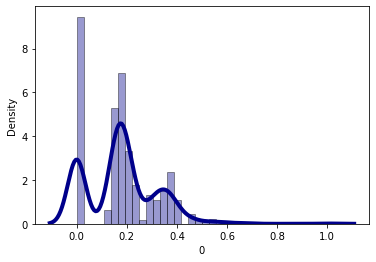

In [28]:
plot_similarity_distribution(cos_sim_data)

In [29]:
recommendation_list = []
for idx, row in reviewer_reviews_df.iterrows():
    url = row['link']
    i = list(doc2vec['url']).index(url)
    recos = give_recommendations(i, doc2vec, cos_sim_data)
    recommendation_list.append(recos)

https://www.burpple.com/shin-minori-japanese-restaurant?bp_ref=%2F%40destiny2309%2Ftimeline
https://www.burpple.com/tamoya-udon-plaza-singapura?bp_ref=%2Ff%2FyiNcVtR5
https://www.burpple.com/uminamisg?bp_ref=%2Ff%2FQk7vUeQl
https://www.burpple.com/koh-grill-sushi-bar?bp_ref=%2Ff%2FZlJD45Z0
https://www.burpple.com/menbakasg?bp_ref=%2Ff%2F8Frg0TFc
https://www.burpple.com/petit-pain?bp_ref=%2Ff%2Fm-D7Zzj8
https://www.burpple.com/patisserie-cle?bp_ref=%2Ff%2FyzqIFo8a
https://www.burpple.com/puffs-and-peaks?bp_ref=%2Ff%2FDyv2ZgqM
https://www.burpple.com/simple-cafe?bp_ref=%2Ff%2FkpyvyUbA
https://www.burpple.com/rrooll?bp_ref=%2Ff%2FSM5mOcAH
https://www.burpple.com/old-world-bakuteh?bp_ref=%2Ff%2Fi7d7uAzg
https://www.burpple.com/swenson-yishun?bp_ref=%2Ff%2FdMO1bcg9
https://www.burpple.com/min-jiang-goodwood-park?bp_ref=%2Ff%2FRmSxdsNZ
https://www.burpple.com/peony-jade?bp_ref=%2Ff%2FNF0MWlG_
https://www.burpple.com/peony-jade-keppel-club?bp_ref=%2Ff%2FxxdFr0QB
https://www.burpple.com/tampin

In [30]:
reviewer_reviews_df['recommendations'] = recommendation_list
reviewer_reviews_df.head(5)

name  \
0                Kazoku Japanese Cuisine               
1                   Tigerlily Patisserie               
2                Putien (Northpoint City)        ...   
3                Our Tampines Hub Hawker Centre (...   
4                Hokkaido Ramen Santouka (Clarke ...   

                                             address  \
0                1 Goldhill Plaza, Singapore     ...   
1                350 Joo Chiat Road, Singapore   ...   
2                930 Yishun Avenue 2, Singapore  ...   
3                1 Tampines Walk, Singapore      ...   
4                6 Eu Tong Sen Street, Singapore ...   

                                              review  \
0  \n1-for-1 Don\nKazoku Chirashi Don (S$29.90++)...   
1  \nBrunch\nBeehive (S$15+)\nLemon, thyme and ly...   
2  \nBirthday Treat \n20% discount \nValid during...   
3  \nSet C\nSet C (S$2.50)\n‘Cos it’s Friday \nGo...   
4  \nBirthday Treat\n50% off Tokusen Toroniku Ram...   

                                          date  \
0                           4d ago               
1                Feb 26 at 12:44pm               
2                Feb 24 at 10:47pm               
3                 Feb 24 at 8:33am               
4                Feb 19 at 12:27pm               

                                                link    reviewer  keep  \
0  https://www.burpple.com/kazoku-japanese-cuisin...  alamakgirl     1   
1  https://www.burpple.com/tigerlily-patisserie?b...  alamakgirl     1   
2  https://www.burpple.com/putien-8?bp_ref=%2Ff%2...  alamakgirl     1   
3  https://www.burpple.com/our-tampines-hub?bp_re...  alamakgirl     1   
4  https://www.burpple.com/hokkaido-ramen-santouk...  alamakgirl     1   

                                        cleaned_text  \
0  kazoku chirashi s2990 thick slice tuna salmon ...   
1  beehive s15 lemon thyme lychee honey jelly lig...   
2  20 discount valid birthday month member starte...   
3  set c s250 co friday s250 cashback pay paylah ...   
4  50 tokusen toroniku ramen s23 s1150 need redee...   

                                     recommendations  
0  [https://www.burpple.com/shin-minori-japanese-...  
1  [https://www.burpple.com/petit-pain?bp_ref=%2F...  
2  [https://www.burpple.com/old-world-bakuteh?bp_...  
3  [https://www.burpple.com/tampines-round-market...  
4  [https://www.burpple.com/ippudo-19?bp_ref=%2Ff...

In [31]:
reviewer_reviews_df.to_csv('doc2vec_content_recommendation.csv')

## LDA Recommendation Results

In [32]:
lda = pd.read_csv("../topic_modelling/lda_labelled_restaurants_4.csv", index_col = 0)

In [33]:
lda = standardise(lda, 'url')

/var/folders/74/n55gd6gs38n5wj2k6hwrc_yc0000gn/T/ipykernel_4192/3381840846.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[old_data.drop(url_col_name,axis = 1).columns] = pd.DataFrame(scaler.fit_transform(old_data.drop(url_col_name, axis =1)))
/var/folders/74/n55gd6gs38n5wj2k6hwrc_yc0000gn/T/ipykernel_4192/3381840846.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[old_data.drop(url_col_name,axis = 1).columns] = pd.DataFrame(scaler.fit_transform(old_data.drop(url_col_name, axis =1)))
/var/folders/74/n55gd6gs38n5

In [34]:
cos_sim_data = generate_similarities(lda)

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


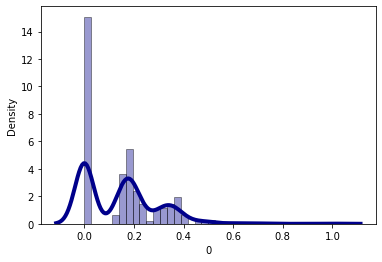

In [35]:
plot_similarity_distribution(cos_sim_data)

In [36]:
recommendation_list = []
for idx, row in reviewer_reviews_df.iterrows():
    url = row['link']
    i = list(doc2vec['url']).index(url)
    recos = give_recommendations(i, lda, cos_sim_data)
    recommendation_list.append(recos)

https://www.burpple.com/shin-minori-japanese-restaurant?bp_ref=%2F%40destiny2309%2Ftimeline
https://www.burpple.com/tamoya-udon-plaza-singapura?bp_ref=%2Ff%2FyiNcVtR5
https://www.burpple.com/seiwaa-okonomiyaki-tepanyaki-restaurant?bp_ref=%2Ff%2FA6nTuRLw
https://www.burpple.com/douraku-sushi-park-regis-singapore?bp_ref=%2Ff%2FeBbf61iz
https://www.burpple.com/uminamisg?bp_ref=%2Ff%2FQk7vUeQl
https://www.burpple.com/petit-pain?bp_ref=%2Ff%2Fm-D7Zzj8
https://www.burpple.com/puffs-and-peaks?bp_ref=%2Ff%2FDyv2ZgqM
https://www.burpple.com/simple-cafe?bp_ref=%2Ff%2FkpyvyUbA
https://www.burpple.com/patisserie-cle?bp_ref=%2Ff%2FyzqIFo8a
https://www.burpple.com/brotherbird-milk-croissants?bp_ref=%2Ff%2FP8V-F7QW
https://www.burpple.com/swenson-yishun?bp_ref=%2Ff%2FdMO1bcg9
https://www.burpple.com/hua-ting-restaurant?bp_ref=%2Ff%2FHqjXH78e
https://www.burpple.com/xi-yan-shaw?bp_ref=%2Ff%2Fu2OcfwuC
https://www.burpple.com/red-star-restaurant?bp_ref=%2Ff%2FyrsxZJ5w
https://www.burpple.com/old-world-b

In [37]:
reviewer_reviews_df['recommendations'] = recommendation_list
reviewer_reviews_df.head(5)

name  \
0                Kazoku Japanese Cuisine               
1                   Tigerlily Patisserie               
2                Putien (Northpoint City)        ...   
3                Our Tampines Hub Hawker Centre (...   
4                Hokkaido Ramen Santouka (Clarke ...   

                                             address  \
0                1 Goldhill Plaza, Singapore     ...   
1                350 Joo Chiat Road, Singapore   ...   
2                930 Yishun Avenue 2, Singapore  ...   
3                1 Tampines Walk, Singapore      ...   
4                6 Eu Tong Sen Street, Singapore ...   

                                              review  \
0  \n1-for-1 Don\nKazoku Chirashi Don (S$29.90++)...   
1  \nBrunch\nBeehive (S$15+)\nLemon, thyme and ly...   
2  \nBirthday Treat \n20% discount \nValid during...   
3  \nSet C\nSet C (S$2.50)\n‘Cos it’s Friday \nGo...   
4  \nBirthday Treat\n50% off Tokusen Toroniku Ram...   

                                          date  \
0                           4d ago               
1                Feb 26 at 12:44pm               
2                Feb 24 at 10:47pm               
3                 Feb 24 at 8:33am               
4                Feb 19 at 12:27pm               

                                                link    reviewer  keep  \
0  https://www.burpple.com/kazoku-japanese-cuisin...  alamakgirl     1   
1  https://www.burpple.com/tigerlily-patisserie?b...  alamakgirl     1   
2  https://www.burpple.com/putien-8?bp_ref=%2Ff%2...  alamakgirl     1   
3  https://www.burpple.com/our-tampines-hub?bp_re...  alamakgirl     1   
4  https://www.burpple.com/hokkaido-ramen-santouk...  alamakgirl     1   

                                        cleaned_text  \
0  kazoku chirashi s2990 thick slice tuna salmon ...   
1  beehive s15 lemon thyme lychee honey jelly lig...   
2  20 discount valid birthday month member starte...   
3  set c s250 co friday s250 cashback pay paylah ...   
4  50 tokusen toroniku ramen s23 s1150 need redee...   

                                     recommendations  
0  [https://www.burpple.com/shin-minori-japanese-...  
1  [https://www.burpple.com/petit-pain?bp_ref=%2F...  
2  [https://www.burpple.com/swenson-yishun?bp_ref...  
3  [https://www.burpple.com/lau-wang-claypot-deli...  
4  [https://www.burpple.com/sanpoutei-ramen-1?bp_...

In [38]:
reviewer_reviews_df.to_csv('lda_content_recommendation.csv')